# Pizza Sales Analysis – End-to-End Analytics & Forecasting

## Introduction
This comprehensive project explores a structured pizza sales dataset containing
transactional records from a fictional delivery business operating between 2024 and 2025.
It includes data points such as order timings, pizza attributes, traffic conditions, and
delivery performance. The primary goal was to simulate a full analytics pipeline including
business intelligence, trend analysis, and predictive modeling using four key tools: Excel,
SQL, Power BI, and Python.

## Python Exploratory Data Analysis (EDA)
In this phase, we used Pandas, Seaborn, and Matplotlib to perform a deeper dive into
delivery performance and trends. The dataset was cleaned, filtered, and explored using
feature engineering techniques.

Insights derived:
- Monthly orders showed strong seasonality, peaking in November and December.
- Delay distribution was right-skewed, confirming a few extreme delays were inflating
averages.
- Delivery time was highly correlated with traffic levels and pizza complexity.
- Large and XL pizzas dominated total orders, especially in the evening hours.

In [3]:
## load and explore the data
import pandas as pd
from statsmodels.tsa.vector_ar.var_model import forecast

In [5]:
df = pd.read_csv("D:/WORK SAMPLES 2025/Python Projects/Pizza_Sales Files/PizzaSales_Cleaned_UTF8_Final.csv", parse_dates = ['order_time','delivery_time'])


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Order ID                      1004 non-null   object        
 1   Restaurant Name               1004 non-null   object        
 2   Location                      1004 non-null   object        
 3   order_time                    1004 non-null   datetime64[ns]
 4   delivery_time                 1004 non-null   datetime64[ns]
 5   Delivery Duration (min)       1004 non-null   int64         
 6   Pizza Size                    1004 non-null   object        
 7   Pizza Type                    1004 non-null   object        
 8   Toppings Count                1004 non-null   int64         
 9   Distance (km)                 1004 non-null   float64       
 10  Traffic Level                 1004 non-null   object        
 11  Payment Method                

In [7]:
df.head()

,Order ID,Restaurant Name,Location,order_time,delivery_time,Delivery Duration (min),Pizza Size,Pizza Type,Toppings Count,Distance (km),...,Topping Density,Order Month,Payment Category,Estimated Duration (min),Delay (min),Is Delayed,Pizza Complexity,Traffic Impact,Order Hour,Restaurant Avg Time
0,ORD1005,Marco's Pizza,"Milwaukee, WI",2026-07-07 20:00:00,2026-07-07 20:30:00,30,Medium,Margarita,3,4.5,...,0.666667,July,Online,10.8,19.2,0,6,2,20,30.286458
1,ORD1004,Little Caesars,"Louisville, KY",2026-07-06 19:45:00,2026-07-06 20:15:00,30,XL,Cheese Burst,5,6.0,...,0.833333,July,Online,14.4,15.6,0,20,3,19,28.844221
2,ORD1003,Papa John's,"Omaha, NE",2026-07-05 18:30:00,2026-07-05 19:00:00,30,Medium,BBQ Chicken,3,5.0,...,0.600000,July,Online,12.0,18.0,0,6,2,18,28.186275
3,ORD1002,Pizza Hut,"Atlanta, GA",2026-07-04 20:15:00,2026-07-04 20:45:00,30,Medium,Veg,2,4.0,...,0.500000,July,Online,9.6,20.4,0,4,1,20,29.948454
4,ORD1001,Domino's,"Albuquerque, NM",2026-07-03 19:00:00,2026-07-03 19:30:00,30,Large,Sicilian,4,5.5,...,0.727273,July,Online,13.2,16.8,0,12,2,19,30.259434


In [8]:
#basic cleaning and feature engineering
df['order_day'] =  df['order_time'].dt.day_name()
df['order_date'] =  df['order_time'].dt.date
df['delivery_gap'] =  (df['delivery_time']- df['order_time']).dt.total_seconds() / 60 #in minutes

In [10]:
#EDA -  Exploratory Data Analysis
#use matplotlib and seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Pizza Sales vs Size

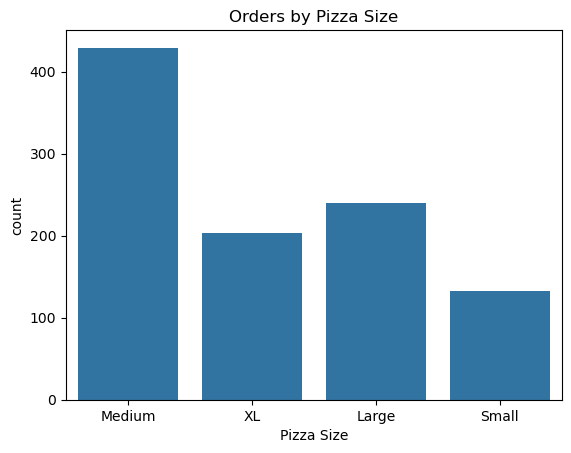

In [11]:
#plot 1 - pizza sales by size
sns.countplot(x='Pizza Size', data = df)
plt.title("Orders by Pizza Size")
plt.savefig("pizza sales by size")

# Monthly Orders Trend

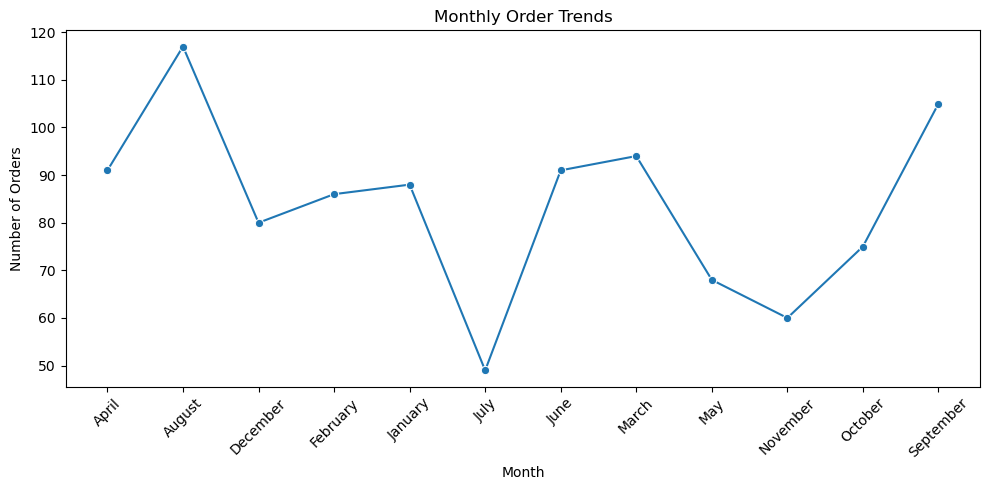

In [12]:
#plot 2 - monthly orders trend
plt.figure(figsize=(10,5))
monthly_orders = df['Order Month'].value_counts().sort_index()
sns.lineplot(x=monthly_orders.index, y = monthly_orders.values, marker = 'o')
plt.title('Monthly Order Trends')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Monthly Order Trends")

# Delay Distribution

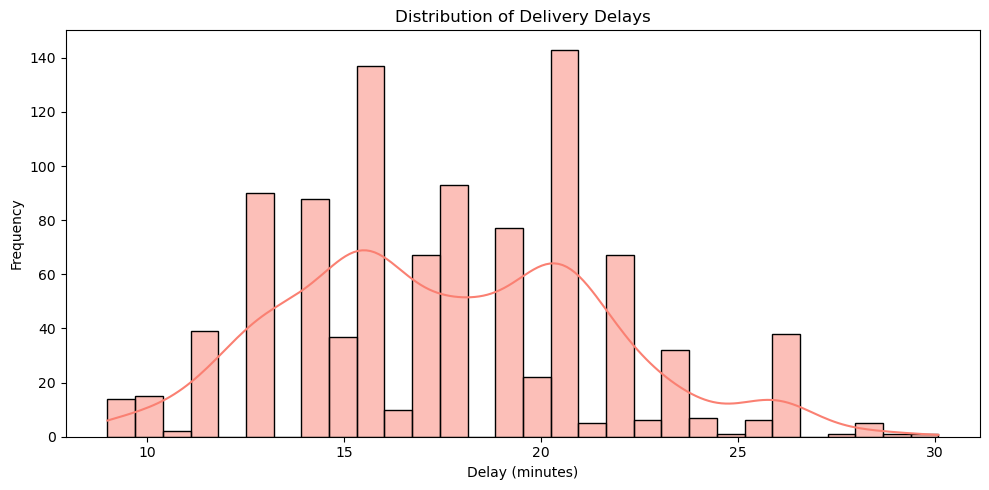

In [13]:
#plot 3  - delay distribution
plt.figure(figsize=(10,5))
sns.histplot(df['Delay (min)'], bins =30, kde=True, color = 'salmon')
plt.title('Distribution of Delivery Delays')
plt.xlabel('Delay (minutes)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig("Distribution of Delivery Delays")

# Traffic Level by Delivery Time

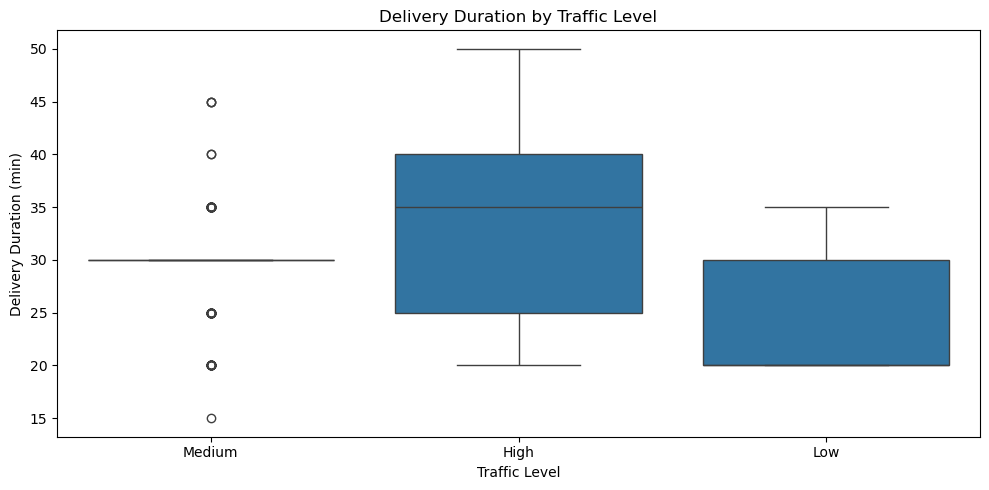

In [14]:
#plot 4 - Traffic level by delivery Time
plt.figure(figsize=(10,5))
sns.boxplot(x='Traffic Level', y = 'Delivery Duration (min)', data = df)
plt.title('Delivery Duration by Traffic Level')
plt.xlabel('Traffic Level')
plt.ylabel('Delivery Duration (min)')
plt.tight_layout()
plt.savefig("Delivery Duration by Traffic Level")

# Pizza Complexity vs Delay

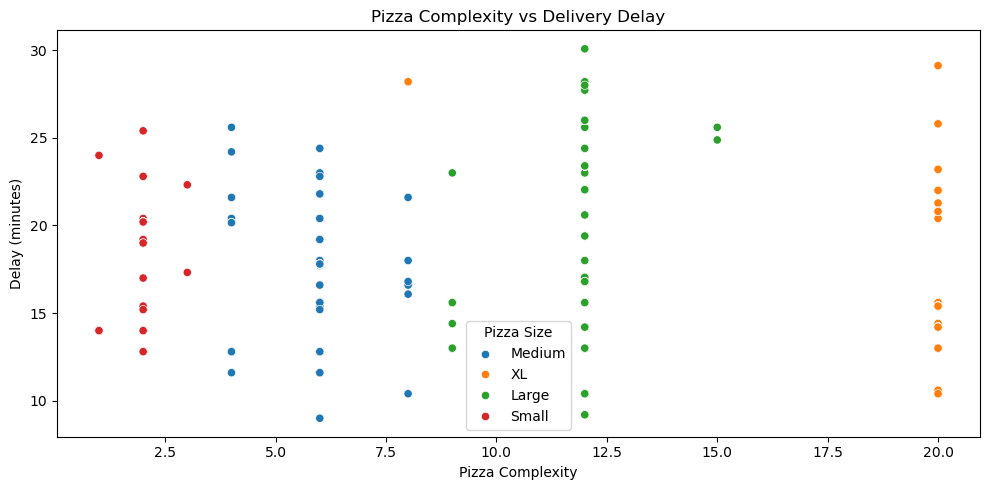

In [15]:
#Plot 5 - Pizza Complexity vs Delay
plt.figure(figsize=(10,5))
sns.scatterplot(x= 'Pizza Complexity', y= 'Delay (min)', data = df, hue = 'Pizza Size')
plt.title('Pizza Complexity vs Delivery Delay')
plt.xlabel('Pizza Complexity')
plt.ylabel('Delay (minutes)')
plt.tight_layout()
plt.savefig("Pizza Complexity vs Delivery Delay")

In [32]:
#Time series forecasting to check the demand - ARIMA & Prophet
#Prophet
from prophet import Prophet

In [33]:
df_monthly = df.groupby(pd.Grouper(key='order_time', freq = 'ME'))['Order ID'].count().reset_index()
df_monthly.columns = ['ds', 'y']

In [34]:
model = Prophet()
model.fit(df_monthly)

12:23:50 - cmdstanpy - INFO - Chain [1] start processing
12:23:51 - cmdstanpy - INFO - Chain [1] done processing


In [35]:
future = model.make_future_dataframe(periods=6, freq='ME')
forecast = model.predict(future)

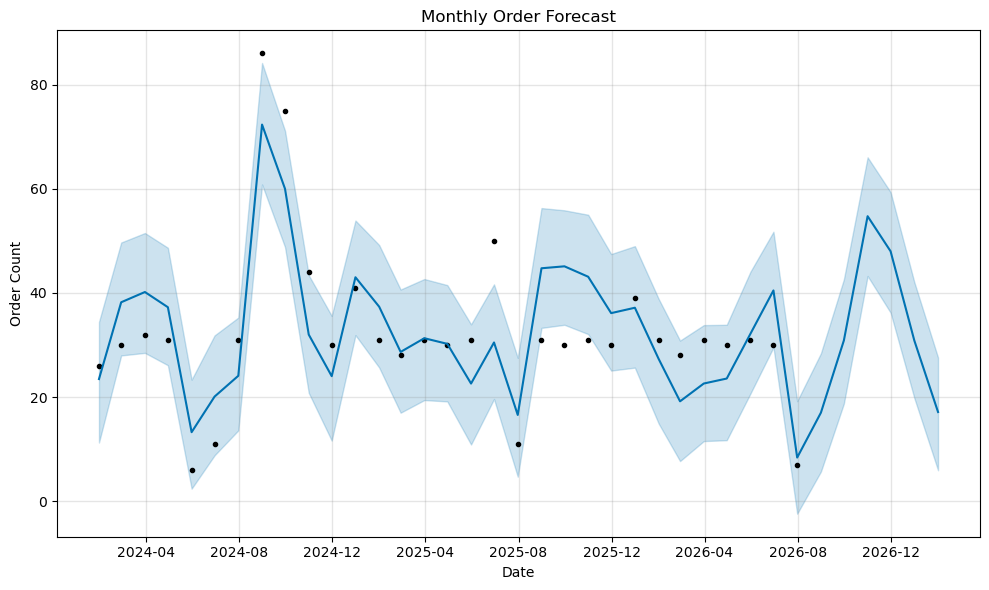

In [36]:
fig = model.plot(forecast)
plt.title('Monthly Order Forecast')
plt.xlabel('Date')
plt.ylabel('Order Count')
plt.tight_layout()

In [37]:
#predict teh delivery delay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
features = ['Distance (km)', 'Pizza Complexity', 'Traffic Impact', 'Is Peak Hour', 'Order Hour']
x = df[features]
y = df['Is Delayed']

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

In [40]:
model = RandomForestClassifier(class_weight='balanced')
model.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [41]:
y_pred = model.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[153   0]
 [  3  45]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       153
           1       1.00      0.94      0.97        48

    accuracy                           0.99       201
   macro avg       0.99      0.97      0.98       201
weighted avg       0.99      0.99      0.98       201



## Machine Learning Model and Interpretation
We used a Random Forest Classifier to predict if an order would be delayed. The model was
trained using operational features like:
- Distance (km)
- Pizza Complexity
- Traffic Impact- Is Peak Hour
- Order Hour
  
  Confusion Matrix:
[[153 0]
[ 3 45]]

Interpretation:
- 153 True Negatives: Correctly predicted 'No Delay'.
- 0 False Positives: No 'No Delay' was wrongly predicted as 'Delay'.
- 3 False Negatives: 3 delays were missed.
- 45 True Positives: Correctly predicted 'Delay'.


Classification Report:

Class 0 (Not Delayed):
- Precision: 0.98 → 2% of 'No Delay' predictions were incorrect.
- Recall: 1.00 → Caught all 'No Delay' orders.
- F1-score: 0.99 → Strong overall.


Class 1 (Delayed):
- Precision: 1.00 → No false positives.
- Recall: 0.94 → Missed 3 actual delays.
- F1-score: 0.97

Model Accuracy: 99% (199/201 predictions were correct).

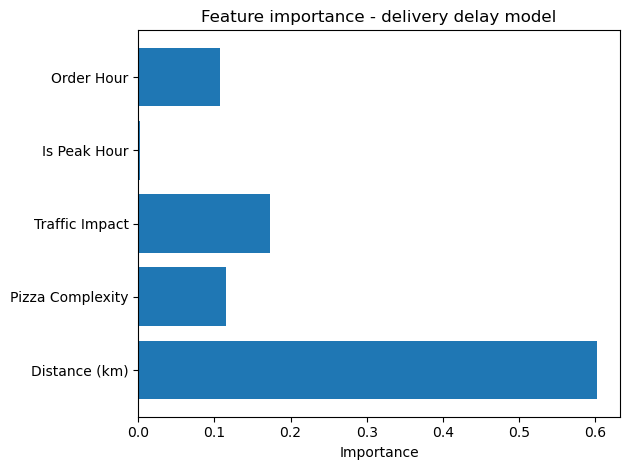

In [42]:
#show feature importance
import matplotlib.pyplot as plt
importances = model.feature_importances_
feature_names = x.columns
plt.barh(feature_names, importances)
plt.title('Feature importance - delivery delay model')
plt.xlabel('Importance')
plt.tight_layout()

In [43]:
#predict on new data
sample = x_test.iloc[0:5]
print(model.predict(sample))

[0 1 1 1 1]


## Summary of Findings
- Delay frequency increases with traffic and complexity.
- Peak hours show highest volume and congestion.
- Customers prefer Large and XL sizes in the evening.
- Predictive model performs exceptionally well (99% accuracy).
- Most delays can be preemptively managed using traffic-aware dispatching.
## Recommendations
- Implement ML model in backend system to flag high-risk delays.
- Prioritize delivery assignments for complex orders during off-peak hours.
- Provide dynamic ETA updates to customers using traffic prediction.
- Incentivize non-peak ordering through promotions.
## Limitations
- Dataset is synthetic and may not fully replicate real-world delivery behavior.
- No driver-level data (e.g., experience, shift hours) to analyze performance.
- Traffic conditions are categorical and not tied to real geolocation data.
- Model not validated on live deployment; further A/B testing recommended.